In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("C:/Users/parit/Downloads/students.csv")

In [4]:
data.head()

,JEEPRE,JEEMAINS,STATUS
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## EDA

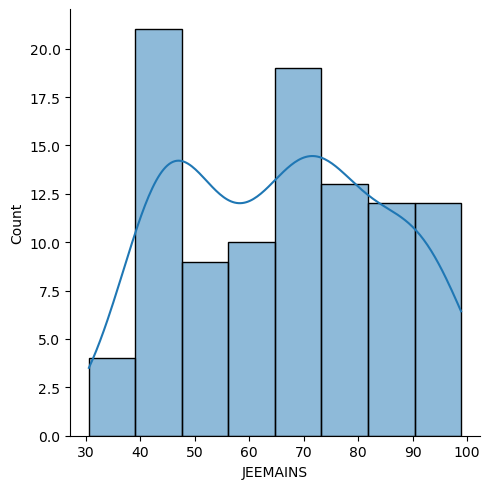

In [6]:
sns.displot(x=data.JEEMAINS,data=data,kde=True)

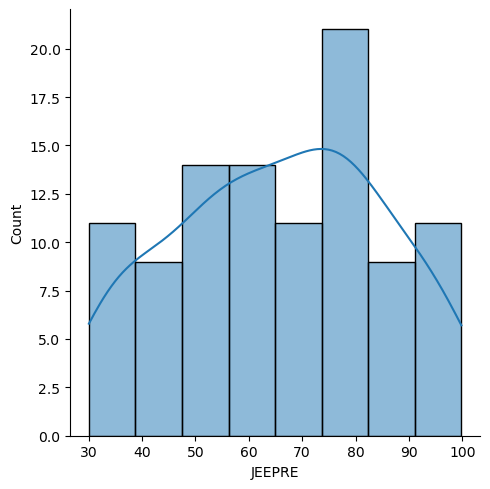

In [7]:
sns.displot(x=data.JEEPRE,data=data,kde=True)

<Axes: xlabel='JEEMAINS', ylabel='JEEPRE'>

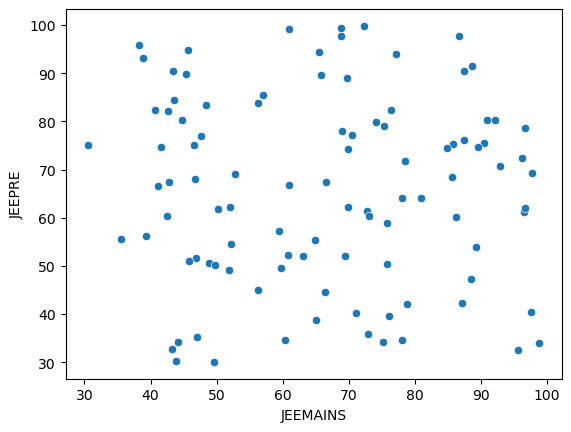

In [9]:
sns.scatterplot(x=data.JEEMAINS,y=data.JEEPRE,data=data)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   JEEPRE    100 non-null    float64
 1   JEEMAINS  100 non-null    float64
 2   STATUS    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [11]:
data.describe()

,JEEPRE,JEEMAINS,STATUS
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [37]:
data.isnull().sum()

JEEPRE      0
JEEMAINS    0
STATUS      0
dtype: int64

In [12]:
y=data["STATUS"]
x=data[["JEEMAINS","JEEPRE"]]

## KNN Classification 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
error=[]
k=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x_train,y_train)
    err=1-round(model.score(x_train,y_train),2)
    error.append(err)
    k.append(i)

In [20]:
pd.DataFrame({"error":error,"k":k})

,error,k
0,0.00,1
1,0.08,2
2,0.08,3
3,0.09,4
4,0.05,5
5,0.08,6
6,0.08,7
7,0.10,8
8,0.06,9
9,0.09,10


In [ ]:
## k=5 having lowest error value 

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn=KNeighborsClassifier(n_neighbors=5)

In [23]:
model=knn.fit(x_train,y_train)

In [26]:
pred=model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [24]:
print("training score=",model.score(x_train,y_train))

training score= 0.95


In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print("testing score=",accuracy_score(y_test,pred))

testing score= 0.8


In [30]:
x_test.head()

,JEEMAINS,JEEPRE
83,59.514282,57.238706
53,60.396342,34.524514
70,43.307173,32.722833
45,52.060992,62.222676
44,45.822701,51.047752


In [32]:
x_test["actual_status"]=y_test
x_test["predicted_status"]=pred
x_test.head()

,JEEMAINS,JEEPRE,actual_status,predicted_status
83,59.514282,57.238706,1,0
53,60.396342,34.524514,0,0
70,43.307173,32.722833,0,0
45,52.060992,62.222676,0,0
44,45.822701,51.047752,0,0


## Eg:- predict status from new raw_data

In [33]:
raw_data=pd.DataFrame({"JEEMAINS":[55,60,67,45],"JEEPRE":[58,65,60,47]})

In [34]:
raw_data

,JEEMAINS,JEEPRE
0,55,58
1,60,65
2,67,60
3,45,47


In [35]:
predict_status=model.predict(raw_data)

In [36]:
raw_data["predicted_status"]=predict_status
raw_data

,JEEMAINS,JEEPRE,predicted_status
0,55,58,0
1,60,65,1
2,67,60,1
3,45,47,0
